In [1]:
# Загружаем необходимые библиотеки

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import decomposition
from sklearn import cluster
%matplotlib inline

In [2]:
# загружаем pickle файл

with open('./descriptors/vdc_type.pickle', 'rb') as pkl_file:
    type_vector = pickle.load(pkl_file)
type_vector

array([[0.02564181, 0.00200849, 0.14198549, ..., 0.1284933 , 0.15204279,
        0.01345227],
       [0.00805954, 0.        , 0.13719751, ..., 0.07015307, 0.13695519,
        0.05582581],
       [0.03058972, 0.03774371, 0.01926565, ..., 0.05357384, 0.02103408,
        0.06070706],
       ...,
       [0.04895582, 0.02745031, 0.03123017, ..., 0.02064629, 0.11645781,
        0.27788612],
       [0.06860567, 0.        , 0.04587822, ..., 0.0141571 , 0.30611995,
        0.30511984],
       [0.0245354 , 0.01397088, 0.02359578, ..., 0.        , 0.23655881,
        0.34663343]], dtype=float32)

In [15]:
type_vector.shape

(416314, 512)

**c PCA на KMeans**

In [4]:
# Уменьшаем размерность данных с помощью PCA

pca = decomposition.PCA(n_components=2)
pca.fit(type_vector)
pca_data = pca.transform(type_vector)

In [13]:
pca_data.shape

(416314, 2)

In [10]:
type_vector[0]

array([2.56418120e-02, 2.00848747e-03, 1.41985491e-01, 2.35095739e-01,
       3.05226535e-01, 5.56632221e-01, 2.59751584e-02, 0.00000000e+00,
       2.81660438e-01, 2.21651662e-02, 5.98368682e-02, 2.15870515e-02,
       0.00000000e+00, 5.66749610e-02, 1.22774364e-02, 2.97156516e-02,
       1.91497039e-02, 5.08042537e-02, 0.00000000e+00, 1.79684965e-03,
       2.92711239e-03, 2.14040428e-02, 5.18214842e-03, 1.16048604e-02,
       8.85035901e-04, 5.74266585e-03, 2.24620346e-02, 3.05498213e-01,
       1.64810061e-01, 6.08473159e-02, 3.65277715e-02, 7.60909319e-02,
       2.08880544e-01, 6.62742555e-01, 6.31233633e-01, 2.89127111e-01,
       1.90517880e-04, 7.13263303e-02, 2.14510411e-01, 3.99532527e-01,
       1.67273626e-01, 1.17639741e-02, 1.07262194e-01, 1.32216944e-03,
       1.02426268e-01, 4.60016867e-03, 3.78918499e-02, 1.36543345e-02,
       3.35661066e-03, 7.19969571e-02, 0.00000000e+00, 4.89342719e-01,
       6.40358478e-02, 6.34907093e-03, 7.21520483e-02, 3.16889286e-01,
      

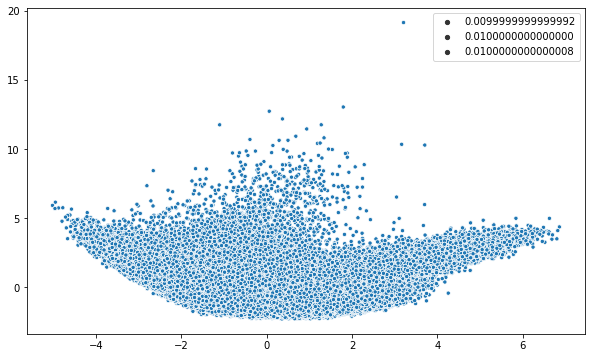

In [88]:
# визиализируем полученные данные с PCA

plt.figure(figsize=(10,6))
sns.scatterplot(pca_data[:,0],pca_data[:,1],size=0.01);

In [89]:
# Ищем оптимальное число кластеров с локтевым методом
d = []

for i in range(1, 11):
    k = cluster.KMeans(n_clusters=i, init='k-means++', random_state=42).fit(pca_data)
    d.append(k.inertia_)

In [90]:
d

[1972769.875,
 929749.6875,
 545701.9375,
 391870.65625,
 317295.375,
 269473.25,
 235083.203125,
 208935.65625,
 184363.9375,
 167307.265625]

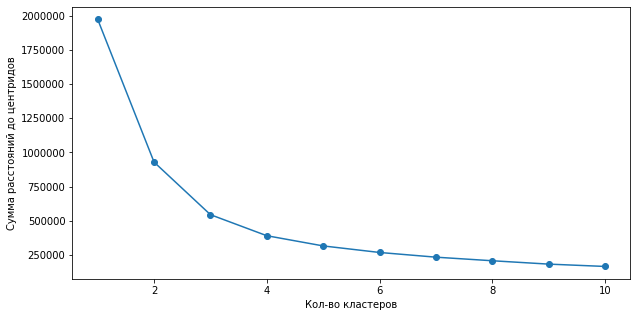

In [91]:
# рисуем график для понимание какое число кластеров

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), d, marker='o')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Сумма расстояний до центридов');

In [92]:
# Видим, что оптимальное количество кластеров 4 обучаем модель на KMeans

model = cluster.KMeans(n_clusters=4, init='k-means++', random_state=42)
y_model = model.fit_predict(pca_data)

In [94]:
# Смотрим метрики

print (sklearn.metrics.calinski_harabasz_score(pca_data, y_model))
print(sklearn.metrics.davies_bouldin_score(pca_data, y_model))

559862.9410910652
0.7419652970480686


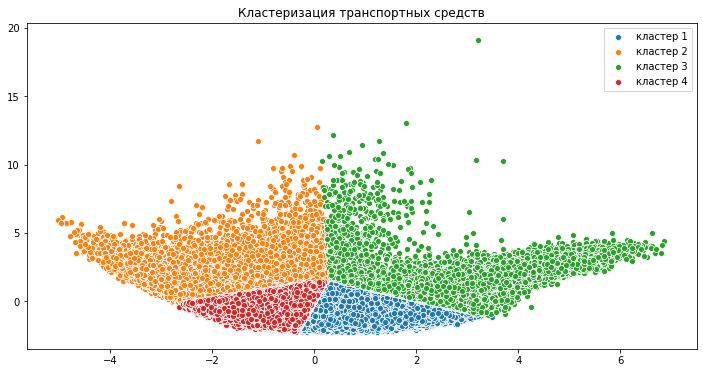

In [93]:
# Визуализируем модель

plt.figure(figsize=(12, 6))
sns.scatterplot(pca_data[y_model == 0, 0], pca_data[y_model == 0, 1], label='кластер 1')
sns.scatterplot(pca_data[y_model == 1, 0], pca_data[y_model == 1, 1], label='кластер 2')
sns.scatterplot(pca_data[y_model == 2, 0], pca_data[y_model == 2, 1], label='кластер 3')
sns.scatterplot(pca_data[y_model == 3, 0], pca_data[y_model == 3, 1], label='кластер 4')
plt.title('Кластеризация транспортных средств')
plt.legend();

После долгих проб и ошибок нашли что оптимлальное кол-во кластеров это 3 согластно метрикам

In [95]:
model = cluster.KMeans(n_clusters=3, init='k-means++',max_iter=100,algorithm='auto',random_state=42)
y_model = model.fit_predict(pca_data)

In [100]:
# Смотрим метрики. Обе метрики уменьшились а значит результат улучшился

import sklearn
print (sklearn.metrics.calinski_harabasz_score(pca_data, y_model))
print(sklearn.metrics.davies_bouldin_score(pca_data, y_model))

544364.5608295995
0.6866665624639713


In [96]:
model.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [97]:
# центроиды класстеров
model.cluster_centers_

array([[ 2.7418606 ,  1.2331616 ],
       [-1.7869697 ,  0.36219645],
       [ 0.7025693 , -0.8700331 ]], dtype=float32)

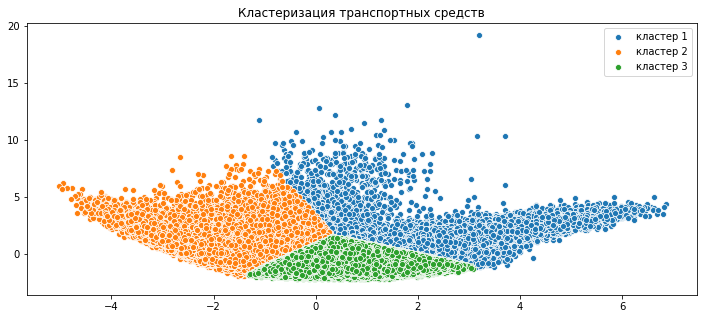

In [101]:
# Визиализируем

plt.figure(figsize=(12, 5))
sns.scatterplot(pca_data[y_model == 0, 0], pca_data[y_model == 0, 1], label='кластер 1')
sns.scatterplot(pca_data[y_model == 1, 0], pca_data[y_model == 1, 1], label='кластер 2')
sns.scatterplot(pca_data[y_model == 2, 0], pca_data[y_model == 2, 1], label='кластер 3')
plt.title('Кластеризация транспортных средств')
plt.legend();

In [102]:
# Поиск выбросов

from sklearn.ensemble import IsolationForest
import numpy as np
clf = IsolationForest( behaviour = 'new', max_samples=100000, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(pca_data)# -1 это выброс, 1 это нет
array_d = {}.fromkeys(preds, 0)
for a in preds:
    array_d[a] += 1
print(array_d)# сколько не выбросов и выбросов

C:\Users\daur_\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


{-1: 25676, 1: 390638}


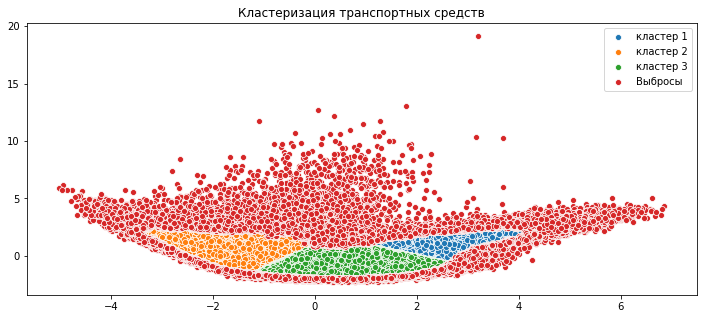

In [103]:
# визуализируем с выбросами

plt.figure(figsize=(12, 5))
sns.scatterplot(pca_data[(y_model == 0)&(preds == 1), 0], pca_data[(y_model == 0)&(preds == 1), 1], label='кластер 1')
sns.scatterplot(pca_data[(y_model == 1)&(preds == 1), 0], pca_data[(y_model == 1)&(preds == 1), 1], label='кластер 2')
sns.scatterplot(pca_data[(y_model == 2)&(preds == 1), 0], pca_data[(y_model == 2)&(preds == 1), 1], label='кластер 3')
sns.scatterplot(pca_data[preds == -1, 0], pca_data[preds == -1, 1], label='Выбросы')

plt.title('Кластеризация транспортных средств')
plt.legend();

In [107]:
# Берем структуру из заранее подготовленного файла и записываем туда наши предсказания и выбросы как отдельные столбцы

batch = pd.read_excel('id.xlsx')
batch['cluster'] = y_model # добавляем в нее результат кластеризации
batch['outlier'] = preds
batch.to_excel('predictions_cluster_type_pca_2dim.xlsx', index=False) # записываем результат на диск

In [108]:
# выводим первые 50 результатов, что бы сравнить с картинками

batch.head(50)

,batch_id,id,cluster,outlier
0,1,1,1,-1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
5,1,1,1,1
6,1,2,2,1
7,1,2,1,1
8,1,2,1,1
9,1,2,2,1


**C TSNE на KMeans**

In [2]:
# загружаем pickle файл, где было применено TSNE

with open('./descriptors/vdc_type_2_tsne.pickle', 'rb') as pkl_file:
    tsne_data = pickle.load(pkl_file)
tsne_data.shape

(416314, 2)

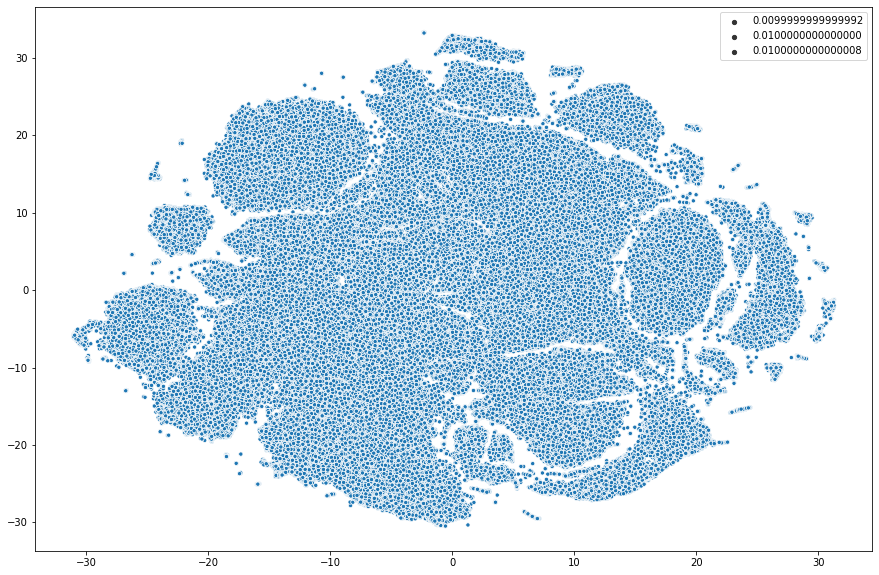

In [3]:
# визиализируем на всех данных TSNE

plt.figure(figsize=(15,10))
sns.scatterplot(tsne_data[:,0],tsne_data[:,1],size=0.01,palette='viridis',alpha=1);
#plt.scatter(tsne_data[:,0],tsne_data[:,1],marker='o',);

In [111]:
# Ищем оптимальное число кластеров с локтевым методом

d = []

for i in range(1, 20):
    k = cluster.KMeans(n_clusters=i, init='k-means++', random_state=42).fit(tsne_data)
    d.append(k.inertia_)

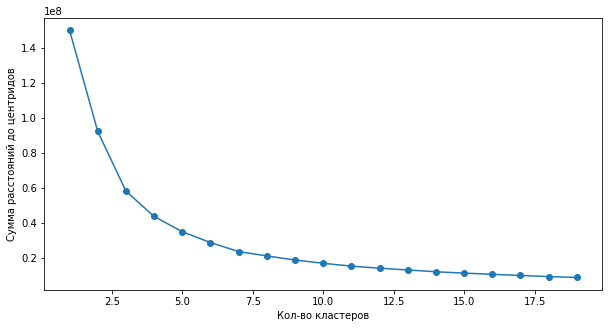

In [112]:
# рисуем график для понимание какое число кластеров

plt.figure(figsize=(10, 5))
plt.plot(range(1, 20), d, marker='o')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Сумма расстояний до центридов');

In [5]:
# Видим, что оптимальное количество кластеров 7 обучаем модель на KMeans

model2 = cluster.KMeans(n_clusters=7, init='k-means++', random_state=42)
y_model2 = model2.fit_predict(tsne_data)

# Смотрим метрики

print (sklearn.metrics.calinski_harabasz_score(tsne_data, y_model2))
print(sklearn.metrics.davies_bouldin_score(tsne_data, y_model2))

371190.07453078695
0.7819979692781354


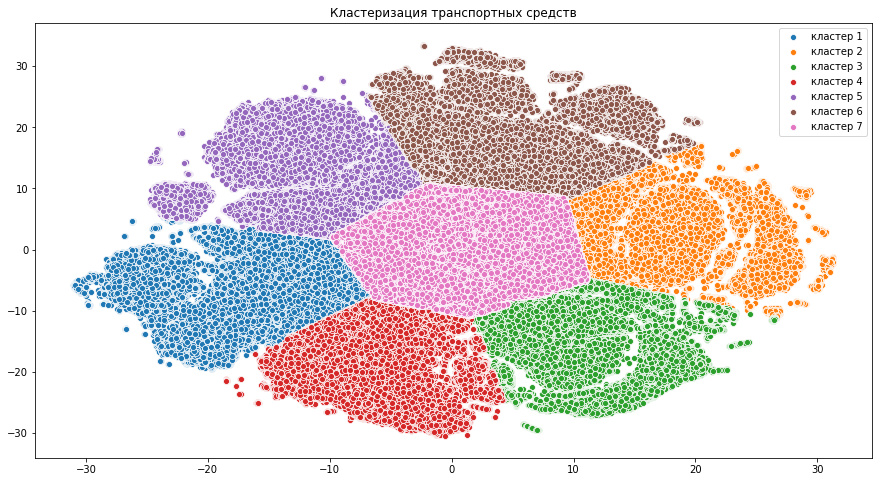

In [7]:
# Визуализируем модель

plt.figure(figsize=(15,8))
sns.scatterplot(tsne_data[y_model2 == 0, 0], tsne_data[y_model2 == 0, 1], label='кластер 1')
sns.scatterplot(tsne_data[y_model2 == 1, 0], tsne_data[y_model2 == 1, 1], label='кластер 2')
sns.scatterplot(tsne_data[y_model2 == 2, 0], tsne_data[y_model2 == 2, 1], label='кластер 3')
sns.scatterplot(tsne_data[y_model2 == 3, 0], tsne_data[y_model2 == 3, 1], label='кластер 4')
sns.scatterplot(tsne_data[y_model2 == 4, 0], tsne_data[y_model2 == 4, 1], label='кластер 5')
sns.scatterplot(tsne_data[y_model2 == 5, 0], tsne_data[y_model2 == 5, 1], label='кластер 6')
sns.scatterplot(tsne_data[y_model2 == 6, 0], tsne_data[y_model2 == 6, 1], label='кластер 7')
plt.title('Кластеризация транспортных средств')
plt.legend();

In [8]:
# Поиск выбросов

from sklearn.ensemble import IsolationForest
import numpy as np
clf = IsolationForest( behaviour = 'new', max_samples=100000, random_state = 42, contamination= 'auto')
preds_tsne = clf.fit_predict(tsne_data)# -1 это выброс, 1 это нет
array_d = {}.fromkeys(preds_tsne, 0)
for a in preds_tsne:
    array_d[a] += 1
print(array_d)# сколько не выбросов и выбросов

C:\Users\daur_\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


{-1: 76693, 1: 339621}


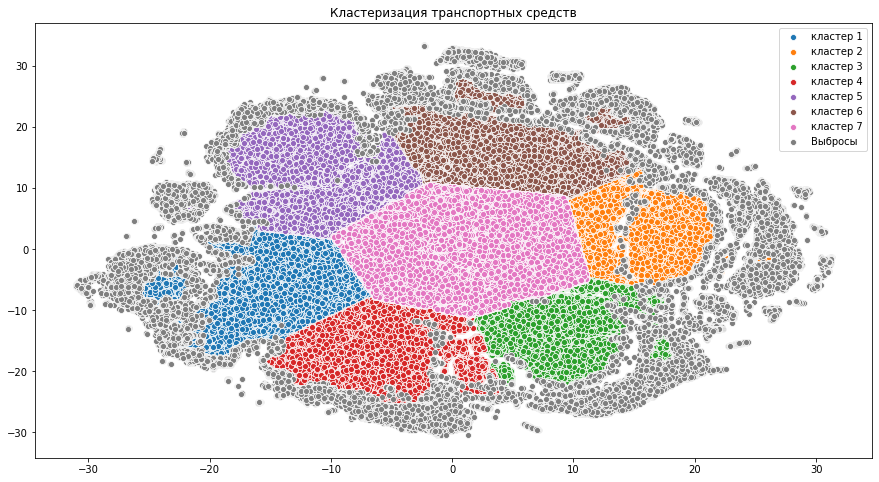

In [9]:
# визуализируем с выбросами

plt.figure(figsize=(15,8))
sns.scatterplot(tsne_data[(y_model2 == 0)&(preds_tsne == 1), 0], tsne_data[(y_model2 == 0)&(preds_tsne == 1), 1], label='кластер 1')
sns.scatterplot(tsne_data[(y_model2 == 1)&(preds_tsne == 1), 0], tsne_data[(y_model2 == 1)&(preds_tsne == 1), 1], label='кластер 2')
sns.scatterplot(tsne_data[(y_model2 == 2)&(preds_tsne == 1), 0], tsne_data[(y_model2 == 2)&(preds_tsne == 1), 1], label='кластер 3')
sns.scatterplot(tsne_data[(y_model2 == 3)&(preds_tsne == 1), 0], tsne_data[(y_model2 == 3)&(preds_tsne == 1), 1], label='кластер 4')
sns.scatterplot(tsne_data[(y_model2 == 4)&(preds_tsne == 1), 0], tsne_data[(y_model2 == 4)&(preds_tsne == 1), 1], label='кластер 5')
sns.scatterplot(tsne_data[(y_model2 == 5)&(preds_tsne == 1), 0], tsne_data[(y_model2 == 5)&(preds_tsne == 1), 1], label='кластер 6')
sns.scatterplot(tsne_data[(y_model2 == 6)&(preds_tsne == 1), 0], tsne_data[(y_model2 == 6)&(preds_tsne == 1), 1], label='кластер 7')
sns.scatterplot(tsne_data[preds_tsne == -1, 0], tsne_data[preds_tsne == -1, 1], label='Выбросы')

plt.title('Кластеризация транспортных средств')
plt.legend();

In [12]:
# центроиды кластеров

model2.cluster_centers_

array([[-17.517477  ,  -6.516071  ],
       [ 19.005878  ,   2.5685406 ],
       [ 11.401449  , -15.74509   ],
       [ -5.723372  , -18.977976  ],
       [-12.69327   ,  13.2466545 ],
       [  5.027801  ,  18.97786   ],
       [  1.5259781 ,   0.12451191]], dtype=float32)

In [14]:
# Берем структуру из заранее подготовленного файла и записываем туда наши предсказания и выбросы как отдельные столбцы

batch = pd.read_excel('id.xlsx')
batch['cluster'] = y_model2 # добавляем в нее результат кластеризации
batch['outlier'] = preds_tsne
batch.to_excel('predictions_cluster_type_tsne_2dim.xlsx', index=False) # записываем результат на диск

In [15]:
# выводим первые 50 результатов, что бы сравнить с картинками

batch.head(50)

,batch_id,id,cluster,outlier
0,1,1,3,-1
1,1,1,3,1
2,1,1,1,-1
3,1,1,3,1
4,1,1,1,-1
5,1,1,3,1
6,1,2,1,-1
7,1,2,0,-1
8,1,2,1,-1
9,1,2,0,-1
